In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.optimize
from scipy.misc import derivative
import numpy as np
from matplotlib import ticker
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose




In [56]:
df = pd.read_csv('clean_data.csv')
df.head(3)

,fips,id,year,element,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,country
0,AC,ACW00011604,1961,TAVG,-0.93,2.32,4.68,7.69,11.24,15.95,15.66,14.77,14.09,11.70,5.06,-0.43,Antigua and Barbuda
1,AC,ACW00011604,1962,TAVG,1.09,0.81,-1.58,6.31,9.04,13.77,15.06,13.89,11.59,9.90,3.19,-1.30,Antigua and Barbuda
2,AC,ACW00011604,1963,TAVG,-7.17,-5.57,-1.03,5.37,12.20,16.23,16.16,15.92,13.28,9.36,5.62,-1.12,Antigua and Barbuda


In [57]:
year_group = df.groupby('year').mean()
year_group.head(3)


,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
year,,,,,,,,,,,,
1961,6.596503,7.262983,8.149934,10.391513,14.239515,18.630701,20.140119,19.947319,16.634087,12.407242,7.701463,6.573764
1962,6.779029,7.716334,6.589528,11.027285,14.915314,17.820533,19.505686,19.516880,16.199104,12.679688,8.207250,5.636804
1963,7.425451,7.404904,7.922432,10.832225,14.817056,18.084707,20.196644,19.568654,17.018353,13.754391,8.735997,5.802251


In [58]:
year_group.tail(3)

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
year,,,,,,,,,,,,
2008,6.559138,7.066439,7.560139,10.941591,14.715230,18.777355,20.771910,20.030814,16.874004,12.368371,8.431280,6.936121
2009,7.215377,7.173510,7.869725,11.302941,15.344572,18.397438,20.316735,20.215064,17.615987,11.171096,9.531471,6.582886
2010,6.556713,6.508815,8.429566,11.945247,15.021387,18.986477,21.354238,20.670111,17.247374,12.713146,7.756206,6.311810


In [59]:

x_years = np.arange(start=1961, stop=2011)
x_months = np.array(['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                   'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

x = list(itertools.product(x_years, x_months))
x_array = np.array(x)
type(x_array)
x_array

array([['1961', 'jan'],
       ['1961', 'feb'],
       ['1961', 'mar'],
       ...,
       ['2010', 'oct'],
       ['2010', 'nov'],
       ['2010', 'dec']], dtype='<U21')

In [60]:
y = np.array(year_group)

flat_y = np.concatenate(y)
type(flat_y)

numpy.ndarray

In [61]:
t = [t for t in range(600)]

In [62]:
def polynomial_function(t, a, b, c, d):
    out = 0
    #print(t, type(t))
    out += (a*t)*(a*t)
    out += b*t
    out += c
    out += d * np.sin(2 * np.pi / 12 * t + np.pi/2)
    
    return  out

In [63]:
polynomial_function(600, 2.05932666e-06, -2.50974818e-04,  1.22860194e+01, -5.74892891e-01)

11.560543144897467

In [64]:
t = np.array(t)

In [65]:
df = year_group.stack()
df = df.reset_index()
df.columns = ['Year', 'Month', 'Temperature']

In [66]:
df['month_year'] = df['Month'] + '-' + df['Year'].astype(str)

In [67]:
dataframe = df[['Temperature', 'month_year']]

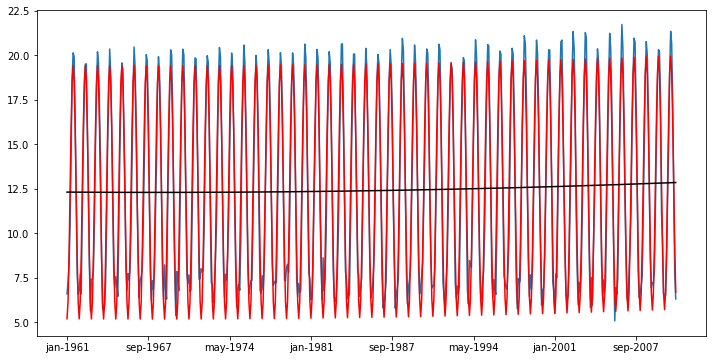

In [68]:
# Plotting the original time series 
plt.figure(figsize=(12, 6))
plt.plot(flat_y)


num_ticks = 10
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))


# Fit the polynomial using curve_fit
popt, pcov = scipy.optimize.curve_fit(polynomial_function, t, flat_y)
# Generate the fitted curve using the optimized parameters
fitted_curve = polynomial_function(t, *popt)

a_popt, b_popt, c_popt, d_popt = popt
fitted_curve_without_cycle = polynomial_function(t, a_popt, b_popt, c_popt, 0)

# Plotting fitted curve

plt.plot(df['month_year'], fitted_curve, color='red', label='Fitted Polynomial')
plt.plot(df['month_year'], fitted_curve_without_cycle, color='black', label='Fitted Polynomial')

plt.show()

In [69]:
popt_a, popt_b, popt_c, popt_d = popt


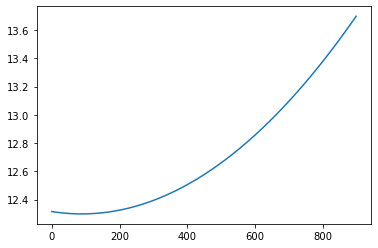

In [70]:
# prediction with this model until 2035 

x = np.array([x for x in range(900)])

plt.plot(x, polynomial_function(x, 1.45932238e-03, -3.75929755e-04,  1.23150291e+01, 0))

In [71]:
a = popt_a
b = popt_b
c = popt_c
d = 0

monthly_growth_rate = []

# Choose a specific value of t to calculate the growth rate at that point
for month in t:
# Calculate the growth rate at t
    growth_rate = derivative(polynomial_function, month, args=(a, b, c, d))
    monthly_growth_rate.append(growth_rate)


In [72]:
yearly_averages = []

# Calculate the average every year
for i in range(0, len(monthly_growth_rate), 12):
    year = monthly_growth_rate[i:i+12]
    yearly_average = sum(year) / len(year)
    yearly_averages.append(yearly_average)



In [73]:
average_per_decade = []

# Calculate the average every year
for i in range(0, len(yearly_averages), 10):
    decade = yearly_averages[i:i+10]
    decade_average = sum(decade) / len(decade)
    average_per_decade.append(decade_average)

In [74]:
average_per_decade

[-0.00012250475990445154,
 0.00038860447447022957,
 0.0008997137088449181,
 0.001410822943219607,
 0.001921932177594295]

In [75]:
growth_rate = derivative(polynomial_function, 2, args=(a, b, c, d))
print(growth_rate)

-0.0003674112680425168


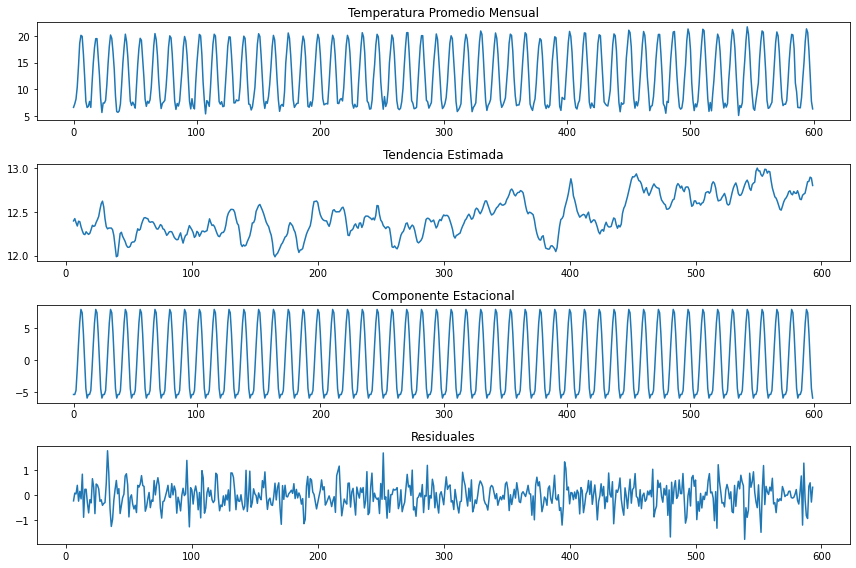

In [85]:
temperature_column = df['Temperature']
result = seasonal_decompose(temperature_column, model = 'additive', period = 12)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(temperature_column)
plt.title('Temperatura Promedio Mensual')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Tendencia Estimada')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Componente Estacional')

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residuales')

plt.tight_layout()
plt.show()

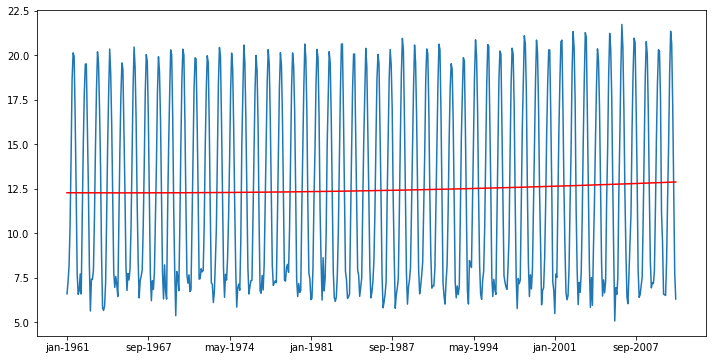

In [76]:
import matplotlib.ticker as ticker

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['month_year'], df['Temperature'])

num_ticks = 10
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))

# Generate x-values for the trend line fitting
t = np.arange(len(df)) 
x_values = t + np.sin(2 * np.pi / 12 * t)

# find trend 
degree = 2
coefficients = np.polyfit(x_values, df['Temperature'], deg=degree)
trend_line = np.polyval(coefficients, range(len(df)))

plt.plot(df['month_year'], trend_line, color='red', label='Trend Line')

plt.show()

In [77]:
coefficients

array([ 2.07974107e-06, -2.36977031e-04,  1.22793902e+01])

In [78]:

plt.figure(figsize=(12, 6))
plt.plot(df['Month_Year'], df['Temperature'], color='blue', label='Temperature')

# Fit a trend line (polynomial curve) of degree 1 (linear fit)
coefficients = np.polyfit(df['Month_Year'], df['Temperature'], deg=1)
trend_line = np.polyval(coefficients, df['Month_Year'])

plt.plot(df['Month_Year'], trend_line, color='red', label='Trend Line')

plt.ylabel('Temperature')
plt.title('Temperature Variation Over Months and Years (1961-2010)')
plt.legend()
plt.show()

KeyError: 'Month_Year'

<Figure size 864x432 with 0 Axes>